In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Data generation

In [2]:
m = 51
x = np.linspace(0,1,m).reshape( (m,1) )
y = np.power( 15*x[:], 1.8 ) + 5 - np.random.normal(1, 3,(m,1))
print( "x: {}".format(x.shape) )
print( "y: {}".format(y.shape) )

x: (51, 1)
y: (51, 1)


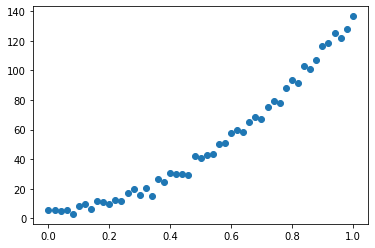

In [3]:
plt.plot(x,y,'o')
plt.show()

### Create augmented X

In [4]:
x_aug = np.hstack((  
    x.reshape(m,1), 
    np.power(x.reshape(m,1),2), 
    np.power(x.reshape(m,1),3), 
    np.power(x.reshape(m,1),4), 
    np.power(x.reshape(m,1),5), 
    np.power(x.reshape(m,1),6), 
    np.power(x.reshape(m,1),7), 
    np.power(x.reshape(m,1),8), 
    np.power(x.reshape(m,1),9), 
    np.ones((m,1)) 
))
print( x_aug.shape )

(51, 10)


## Initialize Weights

In [5]:
w = np.random.random(( x_aug.shape[1], 1))
print( w.shape )

(10, 1)


## Check if we got the math right

In [6]:
y_hat = np.matmul( x_aug, w )
J = (0.5/m) * np.sum( np.power(( y.reshape((m,1)) - y_hat ),2) )

print( "x_aug: {}".format(x_aug.shape) )
print( "y: {}".format(y.shape) )
print( "y_hat: {}".format(y_hat.shape) )
print( "Loss: {}".format(J) )

x_aug: (51, 10)
y: (51, 1)
y_hat: (51, 1)
Loss: 1936.1017928127771


# Training

In [7]:
epoch = 1;
err = 0;
lr = 0.0001
x_aug[:,0] = (x_aug[:,0] - x_aug[:,0].min()) / (x_aug[:,0].max() - x_aug[:,0].min()) # normalization

while( epoch < 100000 ):
    y_hat = np.matmul( x_aug, w )
    J = (0.5/m) * np.sum( np.power(( y.reshape((m,1)) - y_hat ),2) )

    err = np.mean( np.power(y-y_hat,2) )
    if( epoch%5000 == 0 ):
        print( "{}: Error {}".format(epoch, err) )

    gradient = -1 * np.average( (y-y_hat)*(x_aug) )
#     gradient = np.vstack(( gradient_10, gradient_20 ))

    w -= lr * gradient
    epoch += 1

5000: Error 1057.5320136830458
10000: Error 372.40392641880175
15000: Error 205.6970287218277
20000: Error 165.13353372526458
25000: Error 155.26353344892954
30000: Error 152.86194291874642
35000: Error 152.27758254253735
40000: Error 152.13539466954583
45000: Error 152.10079719844924
50000: Error 152.09237886444453
55000: Error 152.09033049659644
60000: Error 152.08983208315286
65000: Error 152.08971080807962
70000: Error 152.08968129915766
75000: Error 152.08967411898092
80000: Error 152.0896723718842
85000: Error 152.08967194677675
90000: Error 152.08967184333858
95000: Error 152.08967181816985


# Predicting

In [8]:
y_pred = np.matmul( x_aug, w )

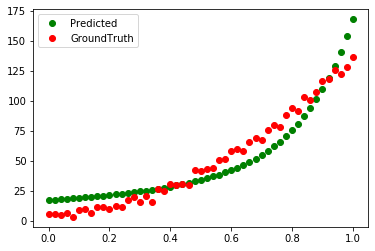

In [9]:
plt.plot( x, y_pred, 'go', label="Predicted")
plt.plot( x, y, 'ro', label="GroundTruth")
plt.legend()
plt.show()